<h1>Brewery Development Plan - Final Project</h1> </n>
<h3> Andrew Cox 5-29-19 </h3>

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

<h3>Initiate Client Connection to API </h3>

In [2]:
CLIENT_ID = 'SRGEUERUR2JNJJDKMQLM4VJNEZ131SYQN5PNB1JNWG4C0PTM' 
CLIENT_SECRET = 'VT2P2JUGLOSE03SSH4GLWTSXPYOFGMRGYE242PZCCPZSVUGM' 
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SRGEUERUR2JNJJDKMQLM4VJNEZ131SYQN5PNB1JNWG4C0PTM
CLIENT_SECRET:VT2P2JUGLOSE03SSH4GLWTSXPYOFGMRGYE242PZCCPZSVUGM


In [3]:
#Find Charlotte NC latitude and longitude
address = 'Charlotte, NC'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

35.2270869 -80.8431268


In [4]:
#Create variable for searching foursquare API
search_query = 'Brewing'
radius = 8000
print(search_query + ' .... OK!')

Brewing .... OK!


<h3>Query Foursquare URL</h3>

In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=SRGEUERUR2JNJJDKMQLM4VJNEZ131SYQN5PNB1JNWG4C0PTM&client_secret=VT2P2JUGLOSE03SSH4GLWTSXPYOFGMRGYE242PZCCPZSVUGM&ll=35.2270869,-80.8431268&v=20180604&query=Brewing&radius=8000&limit=50'

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cef14f04c1f6753b313af31'},
 'response': {'venues': [{'id': '5113bb89e4b010ed94f6c1e1',
    'name': 'Unknown Brewing Co.',
    'location': {'address': '1327 S Mint St',
     'crossStreet': 'at Lincoln St.',
     'lat': 35.220628649967956,
     'lng': -80.85776921651528,
     'labeledLatLngs': [{'label': 'display',
       'lat': 35.220628649967956,
       'lng': -80.85776921651528}],
     'distance': 1513,
     'postalCode': '28203',
     'cc': 'US',
     'city': 'Charlotte',
     'state': 'NC',
     'country': 'United States',
     'formattedAddress': ['1327 S Mint St (at Lincoln St.)',
      'Charlotte, NC 28203',
      'United States']},
    'categories': [{'id': '50327c8591d4c4b30a586d5d',
      'name': 'Brewery',
      'pluralName': 'Breweries',
      'shortName': 'Brewery',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/brewery_',
       'suffix': '.png'},
      'primary': True}],
    'venuePage': {'id': '119818351'},
   

<h3>Load results into a dataframe </h3>

In [7]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",False,5113bb89e4b010ed94f6c1e1,1327 S Mint St,US,Charlotte,United States,at Lincoln St.,1513,"[1327 S Mint St (at Lincoln St.), Charlotte, N...","[{'label': 'display', 'lat': 35.22062864996795...",35.220629,-80.857769,28203,NC,Unknown Brewing Co.,v-1559172336,119818351
1,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",False,4eb596bb7ee5024d7f16f978,1016 N Davidson St,US,Charlotte,United States,NaN,1567,"[1016 N Davidson St, Charlotte, NC 28206, Unit...","[{'label': 'display', 'lat': 35.23090976801412...",35.230910,-80.826539,28206,NC,Birdsong Brewing Co.,v-1559172336,120910870
2,"[{'id': '4bf58dd8d48988d1e5931735', 'name': 'M...",False,5b597bc690d1ed002cdb82a5,NaN,US,Charlotte,United States,NaN,0,"[Charlotte, NC, United States]","[{'label': 'display', 'lat': 35.2270869, 'lng'...",35.227087,-80.843127,NaN,NC,Resident Culture Brewing,v-1559172336,NaN
3,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",False,58a9db73e9efba5560b3dfae,2101 Central Avenue,US,Charlotte,United States,NaN,3530,"[2101 Central Avenue, Charlotte, NC 28205, Uni...","[{'label': 'display', 'lat': 35.22014444320582...",35.220144,-80.805240,28205,NC,Resident Culture Brewing Co.,v-1559172336,467012655
4,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",False,55f832eb498e5ed456f09b03,2921 N Tryon St,US,Charlotte,United States,NaN,3914,"[2921 N Tryon St, Charlotte, NC 28206, United ...","[{'label': 'display', 'lat': 35.25182474126467...",35.251825,-80.812530,28206,NC,NoDa Brewing Company North End,v-1559172336,NaN


In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Unknown Brewing Co.,Brewery,1327 S Mint St,US,Charlotte,United States,at Lincoln St.,1513,"[1327 S Mint St (at Lincoln St.), Charlotte, N...","[{'label': 'display', 'lat': 35.22062864996795...",35.220629,-80.857769,28203,NC,5113bb89e4b010ed94f6c1e1
1,Birdsong Brewing Co.,Brewery,1016 N Davidson St,US,Charlotte,United States,NaN,1567,"[1016 N Davidson St, Charlotte, NC 28206, Unit...","[{'label': 'display', 'lat': 35.23090976801412...",35.230910,-80.826539,28206,NC,4eb596bb7ee5024d7f16f978
2,Resident Culture Brewing,Music Venue,NaN,US,Charlotte,United States,NaN,0,"[Charlotte, NC, United States]","[{'label': 'display', 'lat': 35.2270869, 'lng'...",35.227087,-80.843127,NaN,NC,5b597bc690d1ed002cdb82a5
3,Resident Culture Brewing Co.,Brewery,2101 Central Avenue,US,Charlotte,United States,NaN,3530,"[2101 Central Avenue, Charlotte, NC 28205, Uni...","[{'label': 'display', 'lat': 35.22014444320582...",35.220144,-80.805240,28205,NC,58a9db73e9efba5560b3dfae
4,NoDa Brewing Company North End,Brewery,2921 N Tryon St,US,Charlotte,United States,NaN,3914,"[2921 N Tryon St, Charlotte, NC 28206, United ...","[{'label': 'display', 'lat': 35.25182474126467...",35.251825,-80.812530,28206,NC,55f832eb498e5ed456f09b03
5,Blue Blaze Brewing Co,Brewery,528 S Turner Ave,US,Charlotte,United States,NaN,2698,"[528 S Turner Ave, Charlotte, NC 28208, United...","[{'label': 'display', 'lat': 35.24077217770564...",35.240772,-80.867625,28208,NC,561be258498e522fe0b52ce8
6,Pilot Brewing,Brewery,1331 Central Ave,US,Charlotte,United States,NaN,2578,"[1331 Central Ave, Charlotte, NC 28205, United...","[{'label': 'display', 'lat': 35.221147, 'lng':...",35.221147,-80.815720,28205,NC,5b6f33aa9e3b650039fce952
7,Lenny Boy Brewing Co.,Brewery,2224 Hawkins St,US,Charlotte,United States,NaN,2887,"[2224 Hawkins St, Charlotte, NC 28203, United ...","[{'label': 'display', 'lat': 35.20845406347192...",35.208454,-80.865208,28203,NC,5053e7474c7fc6b1eec24d66
8,Suffolk Punch Brewing,Brewery,2911 Griffith St,US,Charlotte,United States,NaN,3787,"[2911 Griffith St, Charlotte, NC 28203, United...","[{'label': 'display', 'lat': 35.20039120000659...",35.200391,-80.868949,28203,NC,59037736061b51746eef1aa4
9,Sycamore Brewing,Brewery,2161 Hawkins St,US,Charlotte,United States,NaN,2710,"[2161 Hawkins St, Charlotte, NC 28203, United ...","[{'label': 'display', 'lat': 35.20875397921398...",35.208754,-80.862740,28203,NC,545524a1498eb4041c09bf9d


In [9]:
#Filterout categories that are not breweries
dataframe_filtered = dataframe_filtered[dataframe_filtered.categories == 'Brewery']
#dataframe_filtered

In [10]:
dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Unknown Brewing Co.,Brewery,1327 S Mint St,US,Charlotte,United States,at Lincoln St.,1513,"[1327 S Mint St (at Lincoln St.), Charlotte, N...","[{'label': 'display', 'lat': 35.22062864996795...",35.220629,-80.857769,28203,NC,5113bb89e4b010ed94f6c1e1
1,Birdsong Brewing Co.,Brewery,1016 N Davidson St,US,Charlotte,United States,NaN,1567,"[1016 N Davidson St, Charlotte, NC 28206, Unit...","[{'label': 'display', 'lat': 35.23090976801412...",35.230910,-80.826539,28206,NC,4eb596bb7ee5024d7f16f978
3,Resident Culture Brewing Co.,Brewery,2101 Central Avenue,US,Charlotte,United States,NaN,3530,"[2101 Central Avenue, Charlotte, NC 28205, Uni...","[{'label': 'display', 'lat': 35.22014444320582...",35.220144,-80.805240,28205,NC,58a9db73e9efba5560b3dfae
4,NoDa Brewing Company North End,Brewery,2921 N Tryon St,US,Charlotte,United States,NaN,3914,"[2921 N Tryon St, Charlotte, NC 28206, United ...","[{'label': 'display', 'lat': 35.25182474126467...",35.251825,-80.812530,28206,NC,55f832eb498e5ed456f09b03
5,Blue Blaze Brewing Co,Brewery,528 S Turner Ave,US,Charlotte,United States,NaN,2698,"[528 S Turner Ave, Charlotte, NC 28208, United...","[{'label': 'display', 'lat': 35.24077217770564...",35.240772,-80.867625,28208,NC,561be258498e522fe0b52ce8
6,Pilot Brewing,Brewery,1331 Central Ave,US,Charlotte,United States,NaN,2578,"[1331 Central Ave, Charlotte, NC 28205, United...","[{'label': 'display', 'lat': 35.221147, 'lng':...",35.221147,-80.815720,28205,NC,5b6f33aa9e3b650039fce952
7,Lenny Boy Brewing Co.,Brewery,2224 Hawkins St,US,Charlotte,United States,NaN,2887,"[2224 Hawkins St, Charlotte, NC 28203, United ...","[{'label': 'display', 'lat': 35.20845406347192...",35.208454,-80.865208,28203,NC,5053e7474c7fc6b1eec24d66
8,Suffolk Punch Brewing,Brewery,2911 Griffith St,US,Charlotte,United States,NaN,3787,"[2911 Griffith St, Charlotte, NC 28203, United...","[{'label': 'display', 'lat': 35.20039120000659...",35.200391,-80.868949,28203,NC,59037736061b51746eef1aa4
9,Sycamore Brewing,Brewery,2161 Hawkins St,US,Charlotte,United States,NaN,2710,"[2161 Hawkins St, Charlotte, NC 28203, United ...","[{'label': 'display', 'lat': 35.20875397921398...",35.208754,-80.862740,28203,NC,545524a1498eb4041c09bf9d
10,Town Brewing Company,Brewery,800 Grandin Rd,US,Charlotte,United States,Morehead St,2085,"[800 Grandin Rd (Morehead St), Charlotte, NC 2...","[{'label': 'display', 'lat': 35.22979349877174...",35.229793,-80.865819,28208,NC,5ba4ea5401bc5a002c4e93f3


<h3>Create visual of Brewery Results</h3>

In [11]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around uptown Charlotte

# add a red circle marker to represent the Uptown Charlotte
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Uptown Charlotte',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Breweries as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

<h3>Cluster Breweries into 3 clusters</h3>

In [12]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [13]:
#One hot encoding by postalCode
# one hot encoding
dataframe_filtered_onehot = pd.get_dummies(dataframe_filtered[['postalCode']], prefix="", prefix_sep="")
dataframe_filtered_onehot['postalCode'] =dataframe_filtered['postalCode'] 
dataframe_filtered_onehot['lat'] =dataframe_filtered['lat'] 
dataframe_filtered_onehot['lng'] =dataframe_filtered['lng'] 
dataframe_filtered_onehot['name'] =dataframe_filtered['name'] 
dataframe_filtered_onehot.head()

,28202,28203,28204,28205,28206,28208,28209,28217,postalCode,lat,lng,name
0,0,1,0,0,0,0,0,0,28203,35.220629,-80.857769,Unknown Brewing Co.
1,0,0,0,0,1,0,0,0,28206,35.230910,-80.826539,Birdsong Brewing Co.
3,0,0,0,1,0,0,0,0,28205,35.220144,-80.805240,Resident Culture Brewing Co.
4,0,0,0,0,1,0,0,0,28206,35.251825,-80.812530,NoDa Brewing Company North End
5,0,0,0,0,0,1,0,0,28208,35.240772,-80.867625,Blue Blaze Brewing Co


In [14]:
#Group breweries by postalCode
dataframe_filtered_grouped = dataframe_filtered_onehot.groupby('postalCode').mean().reset_index()
dataframe_filtered_grouped

,postalCode,28202,28203,28204,28205,28206,28208,28209,28217,lat,lng
0,28202,1,0,0,0,0,0,0,0,35.222487,-80.850839
1,28203,0,1,0,0,0,0,0,0,35.207866,-80.864803
2,28204,0,0,1,0,0,0,0,0,35.225048,-80.821365
3,28205,0,0,0,1,0,0,0,0,35.231852,-80.809735
4,28206,0,0,0,0,1,0,0,0,35.241367,-80.819534
5,28208,0,0,0,0,0,1,0,0,35.235283,-80.866722
6,28209,0,0,0,0,0,0,1,0,35.153926,-80.838588
7,28217,0,0,0,0,0,0,0,1,35.185561,-80.884069


In [15]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dataframe_filtered_grouped)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 2, 2, 2, 0], dtype=int32)

In [16]:
# add clustering labels
dataframe_filtered_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [17]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dataframe_filtered_grouped['lat'], dataframe_filtered_grouped['lng'], dataframe_filtered_grouped['postalCode'], dataframe_filtered_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3>Brewery Times Data Analysis </h3>

In [22]:
brewdf = pd.read_csv('Times_Data.csv')
brewdf.head(7)

,Weekday,Sugar Creek Brewing Company (Cluster0),Thirsty Nomad Brewing Co. (Cluster0),Triple C Brewing Company (Cluster1),NoDa Brewing Company (Cluster1),Town Brewing Company (Cluster2),Blue Blaze Brewing Co (Cluster2)
0,Sunday,3,5,5,9,5,5
1,Monday,3,0,0,3,3,0
2,Tuesday,5,5,3,3,0,5
3,Wednesday,5,5,3,5,5,5
4,Thursday,3,3,9,5,7,3
5,Friday,3,7,5,5,9,5
6,Saturday,9,9,7,9,9,9


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

brewdf = brewdf.melt('Weekday',var_name = 'Brewery',value_name = 'vals')

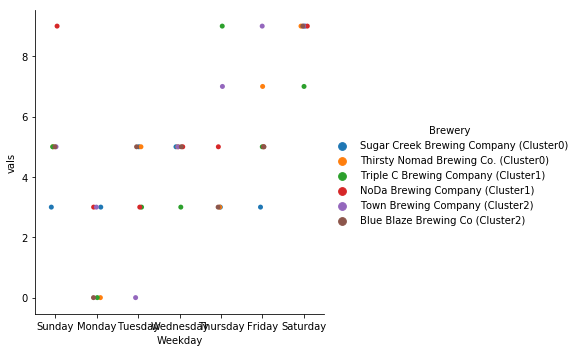

In [20]:
splot = sns.catplot(x="Weekday", y="vals", hue='Brewery', data=brewdf)

<h3>Foot Traffic Results </h3>

In [23]:
#Explore Cluster 0
#Re-load brewdf readcsv
brewdf['Sugar Creek Brewing Company (Cluster0)'].describe()

count    7.000000
mean     4.428571
std      2.225395
min      3.000000
25%      3.000000
50%      3.000000
75%      5.000000
max      9.000000
Name: Sugar Creek Brewing Company (Cluster0), dtype: float64

In [24]:
#Explore Cluster 0
brewdf['Thirsty Nomad Brewing Co. (Cluster0)'].describe()

count    7.000000
mean     4.857143
std      2.853569
min      0.000000
25%      4.000000
50%      5.000000
75%      6.000000
max      9.000000
Name: Thirsty Nomad Brewing Co. (Cluster0), dtype: float64

In [25]:
#Explore Cluster 1
brewdf['Triple C Brewing Company (Cluster1)'].describe()

count    7.000000
mean     4.571429
std      2.935821
min      0.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      9.000000
Name: Triple C Brewing Company (Cluster1), dtype: float64

In [26]:
#Explore Cluster 1
brewdf['NoDa Brewing Company (Cluster1)'].describe()

count    7.000000
mean     5.571429
std      2.507133
min      3.000000
25%      4.000000
50%      5.000000
75%      7.000000
max      9.000000
Name: NoDa Brewing Company (Cluster1), dtype: float64

In [27]:
#Explore Cluster 2
brewdf['Town Brewing Company (Cluster2)'].describe()

count    7.000000
mean     5.428571
std      3.258688
min      0.000000
25%      4.000000
50%      5.000000
75%      8.000000
max      9.000000
Name: Town Brewing Company (Cluster2), dtype: float64

In [28]:
#Explore Cluster 2
brewdf['Blue Blaze Brewing Co (Cluster2)'].describe()


count    7.000000
mean     4.571429
std      2.699206
min      0.000000
25%      4.000000
50%      5.000000
75%      5.000000
max      9.000000
Name: Blue Blaze Brewing Co (Cluster2), dtype: float64

In [29]:
#Cluster Sample Averages
"""
cluster 0 = 4.64
cluster 1 = 5.07
cluster 2 = 4.99
"""
#Cluster 1 has the greatest mean pedestrian foot traffic score

'\ncluster 0 = 4.64\ncluster 1 = 5.07\ncluster 2 = 4.99\n'

<h3>Property Data </h3>

In [30]:
#dataframe describing the property cost (yearly) and distance to light rail station
propdf = pd.read_csv('Property_Data.csv')
propdf.head(11)

,Prop_ID,Zip Code,SF,Price(SF),Total Lease (yr),Address,Dist_to_line(mi),Dest,Time(min)
0,1,28203,7656,15.00,114840.00,1420 S Mint St,0.5,501 Bland,11
1,2,28206,5000,15.00,75000.00,1217 Tryon St N,0.8,9th St Station,16
2,3,28206,5000,8.50,42500.00,216 W 24th St,0.4,Charlotte Station,7
3,4,28206,17234,5.50,94787.00,406 W 32nd St,1.0,36th St Station,21
4,5,28206,54552,3.95,215480.40,3001 N Graham St,1.5,36th St Station,29
5,6,28206,11835,4.95,58583.25,453 Atando Ave,1.0,36th St Station,21
6,7,28206,140030,3.95,553118.50,4001 Raleigh St,0.2,Sugar Creek Station,3
7,8,28203,3754,12.00,45048.00,432 Foster Ave,0.4,Newbern Station,9
8,9,28208,156419,4.60,719527.40,1700 Parker Dr,1.9,East/West Station,40
9,10,28208,32400,7.50,243000.00,1923 John Crossland Jr Dr,3.1,East/West Station,63


Text(0.5, 1.0, 'Total Lease Cost per Property')

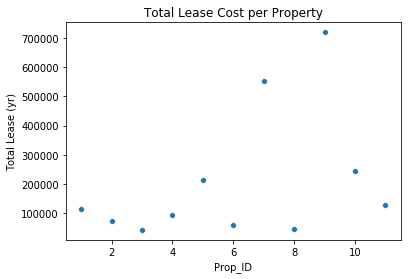

In [31]:
#Scatter plot of Property vs. Total Lease
scatterplot = sns.scatterplot(x="Prop_ID", y="Total Lease (yr)", data=propdf)
ax = plt.gca()
ax.set_title("Total Lease Cost per Property")

In [32]:
#reaadjust columns to display all data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [33]:
propdf = pd.read_csv('Property_Data.csv')
propdf_grouped = propdf.groupby('Zip Code')
propdf_grouped.describe()

Prop_ID                                                  SF  \
           count  mean       std  min   25%   50%    75%   max count   
Zip Code                                                               
28203        2.0   4.5  4.949747  1.0  2.75   4.5   6.25   8.0   2.0   
28206        6.0   4.5  1.870829  2.0  3.25   4.5   5.75   7.0   6.0   
28208        3.0  10.0  1.000000  9.0  9.50  10.0  10.50  11.0   3.0   

                                                                           \
                  mean           std      min       25%      50%      75%   
Zip Code                                                                    
28203      5705.000000   2759.130660   3754.0   4729.50   5705.0   6680.5   
28206     38941.833333  52863.222158   5000.0   6708.75  14534.5  45222.5   
28208     69073.000000  75967.050667  18400.0  25400.00  32400.0  94409.5   

                   Price(SF)                                             \
               max     count       mean       std    min    25%     50%   
Zip Code                                                                  
28203       7656.0       2.0  13.500000  2.121320  12.00  12.75  13.500   
28206     140030.0       6.0   6.975000  4.273260   3.95   4.20   5.225   
28208     156419.0       3.0   6.366667  1.550269   4.60   5.80   7.000   

                      Total Lease (yr)                                \
            75%   max            count           mean            std   
Zip Code                                                               
28203     14.25  15.0              2.0   79944.000000   49350.396473   
28206      7.75  15.0              6.0  173244.858333  196029.086996   
28208      7.25   7.5              3.0  363775.800000  313336.577305   

                                                                \
               min          25%       50%        75%       max   
Zip Code                                                         
28203      45048.0   62496.0000   79944.0   97392.00  114840.0   
28206      42500.0   62687.4375   84893.5  185307.05  553118.5   
28208     128800.0  185900.0000  243000.0  481263.70  719527.4   

         Dist_to_line(mi)                                                    \
                    count      mean       std  min    25%   50%    75%  max   
Zip Code                                                                      
28203                 2.0  0.450000  0.070711  0.4  0.425  0.45  0.475  0.5   
28206                 6.0  0.816667  0.466548  0.2  0.500  0.90  1.000  1.5   
28208                 3.0  2.833333  0.832666  1.9  2.500  3.10  3.300  3.5   

         Time(min)                                                       
             count       mean        std   min    25%   50%   75%   max  
Zip Code                                                                 
28203          2.0  10.000000   1.414214   9.0   9.50  10.0  10.5  11.0  
28206          6.0  16.166667   9.683319   3.0   9.25  18.5  21.0  29.0  
28208          3.0  57.666667  15.695010  40.0  51.50  63.0  66.5  70.0

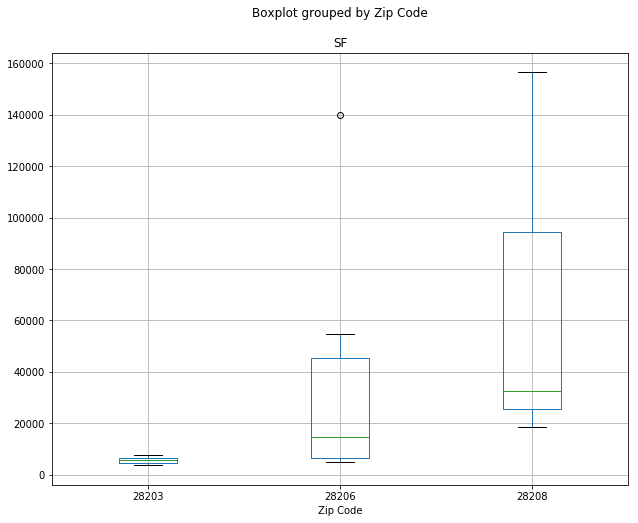

In [34]:
#Boxplot of Zipcode Square Footage
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
propdf.boxplot(column=['SF'], by='Zip Code', ax=ax)

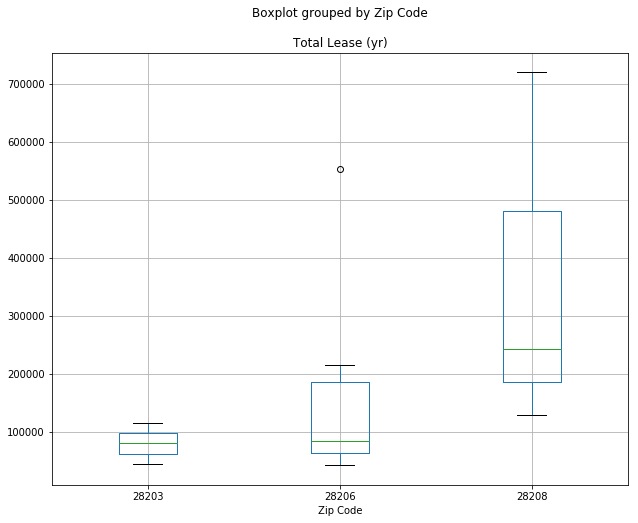

In [35]:
#Boxplot of Total Annual Lease
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
propdf.boxplot(column=['Total Lease (yr)'], by='Zip Code', ax=ax)

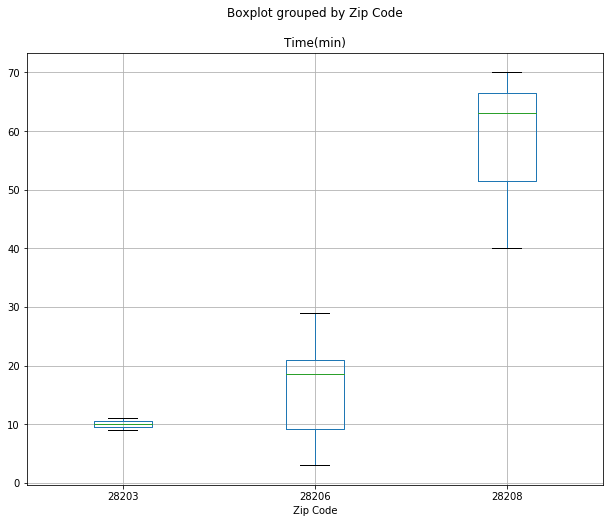

In [36]:
#Boxplot of Walking Time to Light Rail
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
propdf.boxplot(column=['Time(min)'], by='Zip Code', ax=ax)

<h3>The End !</h3>